In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

#Machine Learning in Python
##Classification Basics

###1: Introduction to Classification

Each time you apply for a credit card, car, or mortgage a bank needs to decide to approve or reject you. This can be thought of as a classification problem. The bank uses past data, based on previous applicants, to intelligently make a decision whether to give you a loan. The data which you provide to the bank, such as your credit score, annual income, and the loan amount, can be used to model such a decision. For example, if you have a very high credit score and income then a bank would be likely to provide you a with a loan or credit card.

A classification algorithm uses features, which are attributes known about our observations, to predict an outcome or category. In this case, we are observing a person with certian financial attributes and deciding whether to approve or reject them for a credit card by predicting whether or no they will pay their credit card payments. Classification models produce a probability output, a number which is between 0 and 1. For example, if the model scores a person at 0.80, then we'd say the person has an 80% chance of making their credit card payments. Depending on the probability of an applicant making their payments we can decide to approve or reject them for a credit card.

In this lesson we will learn about binary classification and how to evaluate a model's performance. Our dataset provides the labels, whether someone actually made their credit card payments, and a model's output, a probability of a person being approved. Lets also assume we profit off people making their credit card payments.

The file "credit.csv" has two columns. The first column, paid, is the label, whether someone has paid or not paid their credit card in the past. The second column, model_score, is the probability of being approved. model_score was retrieved from a model we at dataquest trained. The output of this model is explicity given to use throughout this mission.

####Instructions

To start lets see what the data looks like. Using matplotlib, make a scatter plot with model_score on the x-axis and paid on the y-axis.

   paid  model_score
0     1     0.787062
1     1     0.959871
2     1     0.881820
3     1     0.918720
4     1     0.776411
5     1     0.541068
6     1     1.000000
7     1     0.882755
8     1     0.705474
9     1     0.818945


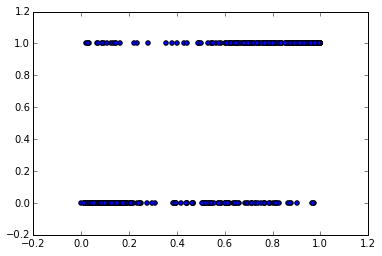

In [2]:
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

# Read file
credit = pandas.read_csv("data/credit.csv")

# Dataframe of our data
# credit["model_score"] is the probability provided by the model
# credit["paid"] is the observed payments
# .head(10) shows the first 10 rows of the dataframe
print(credit.head(10))

plt.scatter(credit["model_score"], credit["paid"])
plt.show()

###2: Predictive Power

In practice, more often than not, the prediction accuracy will be the most important result. As seen in the previous screen, our model's output is a probability between 0 and 1. In order to decide if a person is approved for a credit card, we can use our model's probabilities of whether someone will or will not make their payments to approve or reject their application by setting a threshold. We will call this threshold the discrimination threshold. For example, if we set the discrimination threshold to 0.6 then a person would be approved for a credit card if the probability of making payments is greater than 0.6. All people with a probablity less than 0.6 would be denied a credit card. By moving this threshold we can approve more or less people depending on the probability of making payments.

The accuracy of this model would then be our prediction of whether someone will be approved versus if they actually paid their credit card payments. Accuracy = # of Correctly Predicted / # of Observations

As we can see from the formula, accuracy is a number between 0 and 1. An accuracy of 1.0 means that the model predicted 100% of credit approvals correctly for the given discrimination threshold. An accuracy of 0.2 means that the model predicted 20% of the outcomes correctly.

####Instructions

Using the dataframe credit with columns model_score and paid use a threshold of 0.50 to compute the accuracy of this model. Assign the result to the variable accuracy.

In [3]:
# Will we approve the credit card based on the probability of paying?
pred = credit["model_score"] > 0.5

# This operation tells us whether the prediction was correct 
print(pred == credit["paid"])
accuracy = sum(pred == credit["paid"]) / len(pred)

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10     False
11      True
12      True
13     False
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21     False
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
623     True
624     True
625     True
626     True
627     True
628     True
629     True
630     True
631     True
632     True
633     True
634     True
635     True
636     True
637     True
638     True
639    False
640     True
641     True
642     True
643     True
644     True
645     True
646     True
647     True
648     True
649     True
650     True
651     True
652     True
dtype: bool


###3: Measures of Binary Discrimination

There are a few important measures of binary discrimination. In particular there are 4 that are used frequently. Each of these count the possible agreements and disagreements of our prediction.
Prediction 	Observation
	        Paid Credit Card 	    Defaulted on Credit Card
Approved 	True Positive (TP) 	    False Positive (FP)
Rejected 	False Negative (FN) 	True Negative (TN)

We can define these terms as:

- True Postive - The person made their credit card payments and we approved their credit card. Made a profit.
- True Negative - The person did not make their payments and we rejected their credit card. Rejected correctly.
- False Positive - The person did not make their payments (defaulted) and we approved their credit card. Lost profit.
- False Negative - The person made their credit card payments and we did not approve their credit card. Missed profit.

In the following screens we will see why these 4 measures are important for measuring discrimination performance.

####Instructions

Count the number of false negatives using the credit dataset with a discrimination threshold of 0.5. Assign the number of false negatives to FN.

In [7]:
# prediction with discrimination threshold at 0.50
pred = credit["model_score"] > 0.5

# number of true positives
TP = sum(((pred == 1) & (credit["paid"] == 1)))
print "TP: ", TP

FN = sum(((pred == 0) & (credit["paid"] == 1)))
print "FN: ", FN

TP:  270
FN:  26


###4: Sensitivity, Specificity, and Fall-Out

Consider that a bank wants to maximize their profits by approving as many credit cards as possible but still managing their risks. They would be inclined to reject applications that have high probabilities of default (failure to pay back their loan) but allow a moderate probability of default if profit can still be made. In this problem, the number of predictions made correctly for a specific discrimination threshold is not a good measure. Instead, we'd like to understand what happens to our predictions as this discrimination threhold moves from 0 to 1. Three measures that are commonly used to understand binary classification models include:

Sensitivity or True Postive Rate - The rate of how applications were correctly approved for a credit application. A high sensitivity indicates that a change in TPR = True Positives / (True Positives + False Negatives)

Specificity or True Negative Rate - The rate of how many applications were correctly identified as rejects TNR = True Negative / (False Positives + True Negatives)

Fall-out or False Positive Rate - The rate of how many applications were falsely approved for credit cards. Ideally we'd keep this value reasonably low relative to the true positive rate. FPR = False Positives / (False Positives + True Negatives)

In the following lesson we will use these rates to gain insight into our model's power.

####Instructions

Using credit compute the True Positive Rate with a discrimination threshold of 0.5. Assign the True positive rate to TPR.

In [25]:
# Predicted to play tennis
pred = credit["model_score"] > 0.5

# Number of true negatives
TN = sum(((pred == 0) & (credit["paid"] == 0)))
print "TN: ", TN

# Number of false positives
FP = sum(((pred == 1) & (credit["paid"] == 0)))
print "FP: ", FP

# Compute the false positive rate
FPR = float(FP) / float(TN + FP)
print "FPR: ", FPR

TP =  sum(((pred == 1) & (credit["paid"] == 1)))
print "TP: ", TP

FP = sum(((pred == 0) & (credit["paid"] == 1)))
print "FP: ", FP

TPR = float(TP) / float(FP + TP)
print "TPR: ", TPR

TN:  297
FP:  60
FPR:  0.168067226891
TP:  270
FP:  26
TPR:  0.912162162162


###5: ROC Curves

The receiver operating characteristic curve, ROC curve, is used to evaluate binary classification. In the previous example we chose a discrimination threshold of 0.5 to discriminate between approving a credit application or not. We can change this discrimination threshold to study how sensitive we should be in discrimination.

Each time the discrimination threshold is changed we compute the true positive and false positive rates. In our example, if the threshold is set to 0.0 then everybody would be predicted to be approved for a credit card, this gives a TPR of 1 and a FPR of 1. If a threshold was set to 1.0 then the application would always be predicted to be rejected, returning TPR=0 and FPR=0. Between thresholds of 0 and 1 we want to see the true positive rate to be higher than the false positive rate. The intuition behind this is, a good classifier will correctly predict true events more than the number of wrong predictions.

If our model has a true positive rate larger than the false positive rate than we know more people will pay the bank back than default.

###6: Computing ROC Curves

To understand how to compute these ROC curves we can look at the function roc_curve. This function is computing the false positive rates and true positive rates for 100 thresholds between 0 and 1. The false positive and true positive rates returned allow us to visually choose an optimal threshold for discrimintation. In terms of credit approvals, we'd like to approve as many applications as possible while minimizing the number of credit card defaults. This will maximize our profit.

####Instructions

Use the function roc_cuve and the data from credit to create a plot where the false positive rates are on the x-axis and true positive rates are on the y-axis.

0.932432432432
0.38


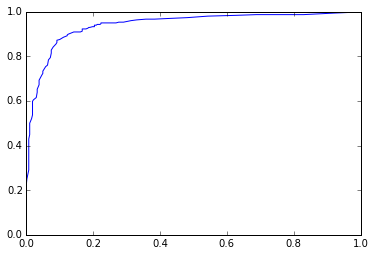

In [40]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

def roc_curve(observed, probs):
    # choose thresholds between 0 and 1 to discriminate prediction
    thresholds = numpy.asarray([float(100 - j) / 100 for j in range(100)])
    
    # initialize false and true positive rates 
    fprs = numpy.asarray([0. for j in range(100)])
    tprs = numpy.asarray([0. for j in range(100)])
    
    # Loop through each threshold
    for j, thres in enumerate(thresholds):
        # Using the new threshold compute predictions
        pred = probs > thres
        # Count the Number of False Positives
        FP = sum((observed == 0) & (pred == 1))
        # Count the Number of True Negatives 
        TN = sum((observed == 0) & (pred == 0))
        # Compute the False Postive Rate
        FPR = float(FP) / float(TN + FP)
        # Count the number of True Positives
        TP = sum((observed == 1) & (pred == 1))
        # Count the number of False Negatives
        FP = sum((observed == 1) & (pred == 0))
        # Compute the True Positive Rate
        TPR = float(TP) / float(FP + TP)
        # Store the true and false positive rates
        fprs[j] = FPR
        tprs[j] = TPR
        
    return fprs, tprs, thresholds

fpr, tpr, thres = roc_curve(credit["paid"], credit["model_score"])
idx = numpy.where(fpr>0.20)[0][0]

print(tpr[idx])
print(thres[idx])
plt.plot(fpr, tpr)

###7: Interpretation of the ROC Curve

Now that we have plotted the ROC curve based on the credit approval data, we must learn how to interpret it. We see this curve has a large increase in the beginning but when the false positive rate reaches 0.20, it flattens out. This flattening tells us that increasing the threshold above the 20% false positive rate will not make the approvals much more conservative. This means that after the 20% false positve rate, the chance of approving someone does not increase much.

To drive this concept home, the true positive rate is 93% when the false positive rate rate is 20% at a discrimination threshold of 0.38. We know that a 93% true positive rate means that we approved nearly all applications which will eventually pay us back, this is great. A false positive rate of 20% is low enough to allow for many applications to be approved and given a credit card. These together will maximize our profit as a bank.

###8: Area Under the Curve

You may notice that the graph for an ROC curve has a particular "shape". This "shape" tells a lot about how good the model is in maximizing true positives and minimizing false positives. However, it makes it really hard to objectively compare one model against another. In order to do that, we can use a metric called AUC. AUC measures the area under the ROC curve. If the fit of a model is perfect, it will always have a true positive rate of 1. This gives us an AUC of 1. Similarly, if a model always has a true positive rate of 0, the AUC will be zero. Because AUC is a single number, and not a graph, we can use it to easily compare a large number of models. A higher AUC means that the model fit better, and a lower AUC means it fit worse. We can compute the AUC by hand, but a simpler way is to use a function defined in the sklearn package.

Sklearn provides many functions which are great for machine learning classification problems. Here we will show how to use the roc_auc_score to compute AUC values.

####Instructions

Compute the AUC using sklearn.metrics.roc_auc_score, model_score, and the observed data, paid. Assign the computed AUC to auc.

In [42]:
from sklearn.metrics import roc_auc_score

probs = [ 0.98200848,  0.92088976,  0.13125231,  0.0130085,   0.35719083,  
         0.34381803, 0.46938187,  0.53918899,  0.63485958,  0.56959959]
obs = [1, 1, 0, 0, 1, 0, 1, 0, 0, 1]

testing_auc = roc_auc_score(obs, probs)
print("Example AUC: {auc}".format(auc=testing_auc))
auc = roc_auc_score(credit["paid"], credit["model_score"])

Example AUC: 0.8


###9: Precision and Recall

If we reject many people that are able to pay for the credit card then we end up missing profit. In return, we also want to minimize the number of defaults we need to endure. To measure this we use a similar measure to the receiver operating characteristic called precision and recall.

The precision and recall are fractions of retrieved instances which are relevant. Relevance is the concept of one topic being connected to another topic in a way that makes it useful to consider the first topic when considering the second. For example, we want to account for the number of approved credit cards that default with the number of approved credit cards that do not.

Precision = True Positives / (True Positives + False Positives)

Recall = True Positives/ (True Positives + False Negatives)

In simple terms, high precision means that an algorithm returned substantially more people will pay their credit card payment than default, while low recall means that we did not capitalize on many applicants that would have paid their credit card payment. Correspondingly, a high recall would approve nearly all applicants which made there payments.

####Instructions

Compute both the precision and recall and set them equal to precision and recall with a discrimination threshold of 0.5 using the credit dataset.

In [46]:
pred = credit["model_score"] > 0.5

# True Positives
TP = sum(((pred == 1) & (credit["paid"] == 1)))
print "TP: ", TP

# False Positives
FP = sum(((pred == 0) & (credit["paid"] == 1)))
print "FP: ", FP

# False Negatives
FN = sum(((pred == 1) & (credit["paid"] == 0)))
print "FN: ", FN

precision = float(TP) / float(TP + FP)
print "precision: ", precision

recall = float(TP) / float(TP + FN)
print "recall: ", recall

TP:  270
FP:  26
FN:  60
precision:  0.912162162162
recall:  0.818181818182


###10: Precision and Recall Curve

The precision and recall curve is computed similar to the ROC curve. Precision and recall are computed for each threshold set between 0 and 1. A good classifier will have high precision with low recall and as recall increases precision will decrease. Similar to ROC, the closer the area under the curve to 1 the better the model. Intuitively, we would like to minimize the number of applicants rejected that would pay their credit card payments while also minimizing the number of applicants approved that default.

We will use the precision_recall_curve function provided by sklearn to easily compute the curve.

####Instructions

Create a plot with recall on the x-axis and precision on the y-axis using precision_recall_curve and the credit dataset.

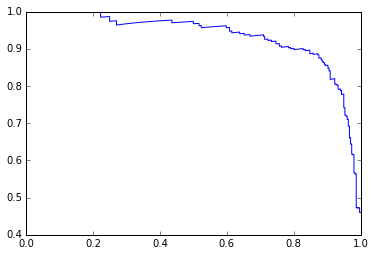

In [51]:
import numpy
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
%matplotlib inline

probs = [ 0.98200848,  0.92088976,  0.13125231,  0.0130085,   0.35719083,  
         0.34381803, 0.46938187,  0.53918899,  0.63485958,  0.56959959]
obs = [1, 1, 0, 0, 1, 0, 1, 0, 0, 1]

precision, recall, thresholds = precision_recall_curve(credit["paid"], credit["model_score"])
plt.plot(recall, precision)

###11: Interpreting the Precision Recall Curve

The precision recall curve we just plotted shows great results. Precision here tells us how many more false positives we are accepting. The drop in precision doesn't start until 90% where there are only few good applicants rejected. This means that we are missing only a few applicants which would pay their credit card payment while also having few defaults. Sounds like a good business model to me!